In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('population.csv',skiprows=4)

In [3]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [4]:
data = data[data['Country Name']=='India']

In [5]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
Unnamed: 66       float64
Length: 67, dtype: object

In [6]:
dataset = data.drop(['Country Name','Country Code','Indicator Name','Indicator Name','Indicator Code'],axis='columns')

In [7]:
dataset.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
109,450547675.0,459642166.0,469077191.0,478825602.0,488848139.0,499123328.0,509631509.0,520400577.0,531513834.0,543084333.0,...,1.280842e+09,1.295601e+09,1.310152e+09,1.324517e+09,1.338677e+09,1.352642e+09,1.366418e+09,1.380004e+09,1.393409e+09,NaN


In [8]:
data=dataset.dropna(axis='columns')

In [9]:
data=data.transpose()

In [10]:
data = data.rename(columns={109:'population'})

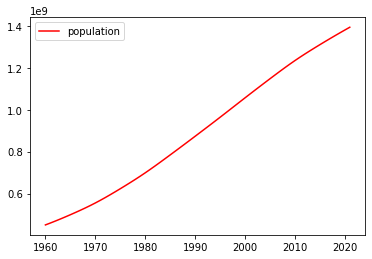

In [11]:
data.plot(c='r');

In [12]:
data.head()

,population
1960,450547675.0
1961,459642166.0
1962,469077191.0
1963,478825602.0
1964,488848139.0


In [13]:
data['yearly_growth']=data['population'].pct_change()

In [14]:
data.head()

,population,yearly_growth
1960,450547675.0,NaN
1961,459642166.0,0.020185
1962,469077191.0,0.020527
1963,478825602.0,0.020782
1964,488848139.0,0.020931


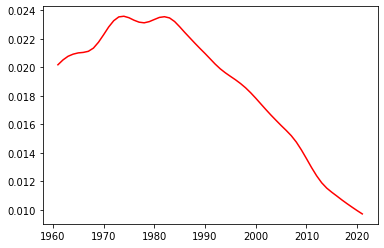

In [15]:
data['yearly_growth'].plot(c='r');

In [16]:
data['smooth'] = data['yearly_growth'].rolling(10).mean()

In [17]:
data.tail()

,population,yearly_growth,smooth
2017,1.338677e+09,0.010690,0.012423
2018,1.352642e+09,0.010432,0.011990
2019,1.366418e+09,0.010184,0.011588
2020,1.380004e+09,0.009943,0.011223
2021,1.393409e+09,0.009713,0.010897


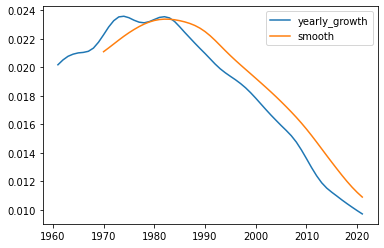

In [18]:
data[['yearly_growth','smooth']].plot();

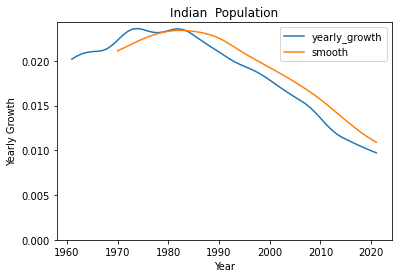

In [19]:
data[['yearly_growth','smooth']].plot(xlabel='Year',ylabel='Yearly Growth',title='Indian  Population',ylim=0);

## conclusion is the population is growing 